In [1]:
from fuzzy_art import *
import sklearn.datasets as ds
import sklearn.decomposition as dcp
import matplotlib.pyplot as plt

In [2]:
iris = ds.load_iris()
data = iris['data'] / np.max(iris['data'], axis=0)
label_true = iris['target']
# pca
pca = dcp.PCA(n_components=2)
pca_xy = pca.fit_transform(data)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.92138578 0.05142129]
[4.9602239  1.17179601]


[0 1]
[0 2]
[0 3]
[0 4]
[1 2]
[1 3]
[1 4]
[2 3]
[2 4]
[3 4]


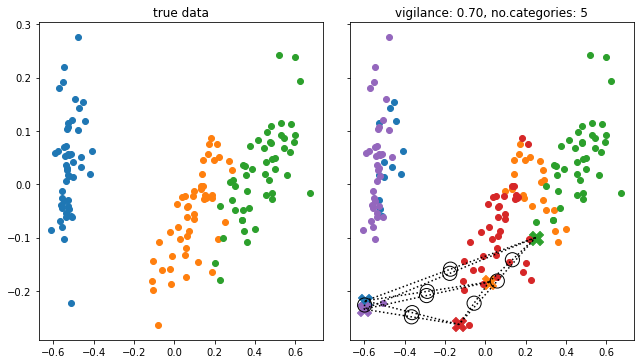

In [7]:
fig, axs = plt.subplots(1, 2,
                        figsize=(9, 5), sharex=True, sharey=True)
fig.tight_layout()

# plot true
for cat_true in range(3):
    axs[0].scatter(*np.where(label_true == cat_true, pca_xy.T, None))
axs[0].set_title('true data')

# use FuzzyART
# init
rho = 0.7
net = FuzzyART(alpha=0.5, rho=rho) # for the current iris data, rho near 0.65 seems the best in clustering data

# train
net.train(data, epochs=100) # each epoch, all data is shuffled
label_pred = net.test(data).astype(int)

cat_number = net.w.shape[0]
cat_centre = pca.transform(net.w[:, :4])

# plot cats
for cat_pred, cat_x, cat_y in zip(range(cat_number), *cat_centre.T):
    c = next(axs[1]._get_lines.prop_cycler)['color']
    axs[1].scatter(*np.where(label_pred == cat_pred, pca_xy.T, None), color = c) # all training samples
    axs[1].scatter(cat_x, cat_y, marker = 'X', s = 200, color = c) # categorical centre
axs[1].set_title('vigilance: {:.2f}, no.categories: {}'.format(rho, cat_number))

# plot inters
for i in range(cat_number):
    for j in range(i + 1, cat_number):
        interidx = np.array([i, j])
        print(interidx)
    
        inter01 = pca.transform([np.mean(net.w[interidx, :4], axis = 0)])
        axs[1].scatter(*inter01.T, marker = 'o', s = 200, edgecolors = 'k', facecolors='none')
        axs[1].plot(*cat_centre[interidx].T, c = 'k', ls = 'dotted')